In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import numpy as np

In [2]:
#List of lists for both time and angles, with keys [replica]
time = [[] for i in range(8)]
angle_74 = [[] for i in range(8)]
angle_147 = [[] for i in range(8)]
for r in range(8):
    f = pd.read_csv("angles_23-54_111-133.xvg", sep="\s+",skiprows=17+30000*r,header=None,nrows=30000) #Every replica has 30k rows
    for k,j in enumerate(f[0]):
        angle_74[r].append(float(f[1][k]))
        angle_147[r].append(float(f[2][k]))
f = pd.read_csv("angles_23-54_111-133.xvg", sep="\s+",skiprows=17,header=None,nrows=30000)
for r in range(8):
    for k,j in enumerate(f[0]):
        time[r].append(float(j)*1e-3) #The time is stored for every replica, but only considering 0-3us

In [3]:
time_dist = [[] for i in range(8)] #Same protocol, but the data is read from different files
mindist = [[] for i in range(8)]
for r in range(8):
    f = pd.read_csv("mindist_gm2a_100dopc_s" + str(r+1) + ".xvg", sep="\s+",skiprows=24,header=None)
    for k,j in enumerate(f[0]):
        time_dist[r].append((float(f[0][k]))*1e-6)
        mindist[r].append(float(f[1][k]))

In [4]:
nobs = len(time[0])
div=100 #To have more or less the same number of values as in mindist
blockmax = int(nobs/div) #Cojo intervalos [0-99] [50-149] [100-199]..., con /50
num_blocks = blockmax - 1 #El numero de bloques totales
print(num_blocks)

299


In [5]:
new_time = [[] for i in range(8)]
mean_74 = [[] for i in range(8)]
var_74 = [[] for i in range(8)]
mean_147 = [[] for i in range(8)]
var_147 = [[] for i in range(8)]
for r in range(8):
    for i in range(num_blocks):
        aux_74 = []
        aux_147 = []
        new_time[r].append(float((div*i))/10000)
        for j in range(div*2):
            aux_74.append(angle_74[r][j+div*i])
            aux_147.append(angle_147[r][j+div*i])
        mean_74[r].append(statistics.mean(aux_74))
        var_74[r].append(statistics.stdev(aux_74))
        mean_147[r].append(statistics.mean(aux_147))
        var_147[r].append(statistics.stdev(aux_147))

In [6]:
print (new_time[0])

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.

In [7]:
nobs = len(time_dist[0])
div=20 #To have more or less the same number of values as in mindist
blockmax = int(nobs/div) #Cojo intervalos [0-99] [50-149] [100-199]..., con /50
num_blocks = blockmax - 1 #El numero de bloques totales
print(num_blocks)

299


In [8]:
new_time_dist = [[] for i in range(8)]
mean_dist = [[] for i in range(8)]
var_dist = [[] for i in range(8)]
for r in range(8):
    for i in range(num_blocks):
        aux_dist = []
        new_time_dist[r].append(float((div*i))/2000) #Correct 1000 for time
        for j in range(div*2):
            aux_dist.append(mindist[r][j+div*i])
        mean_dist[r].append(statistics.mean(aux_dist))
        var_dist[r].append(statistics.stdev(aux_dist))

In [9]:
print (new_time_dist[0])

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.

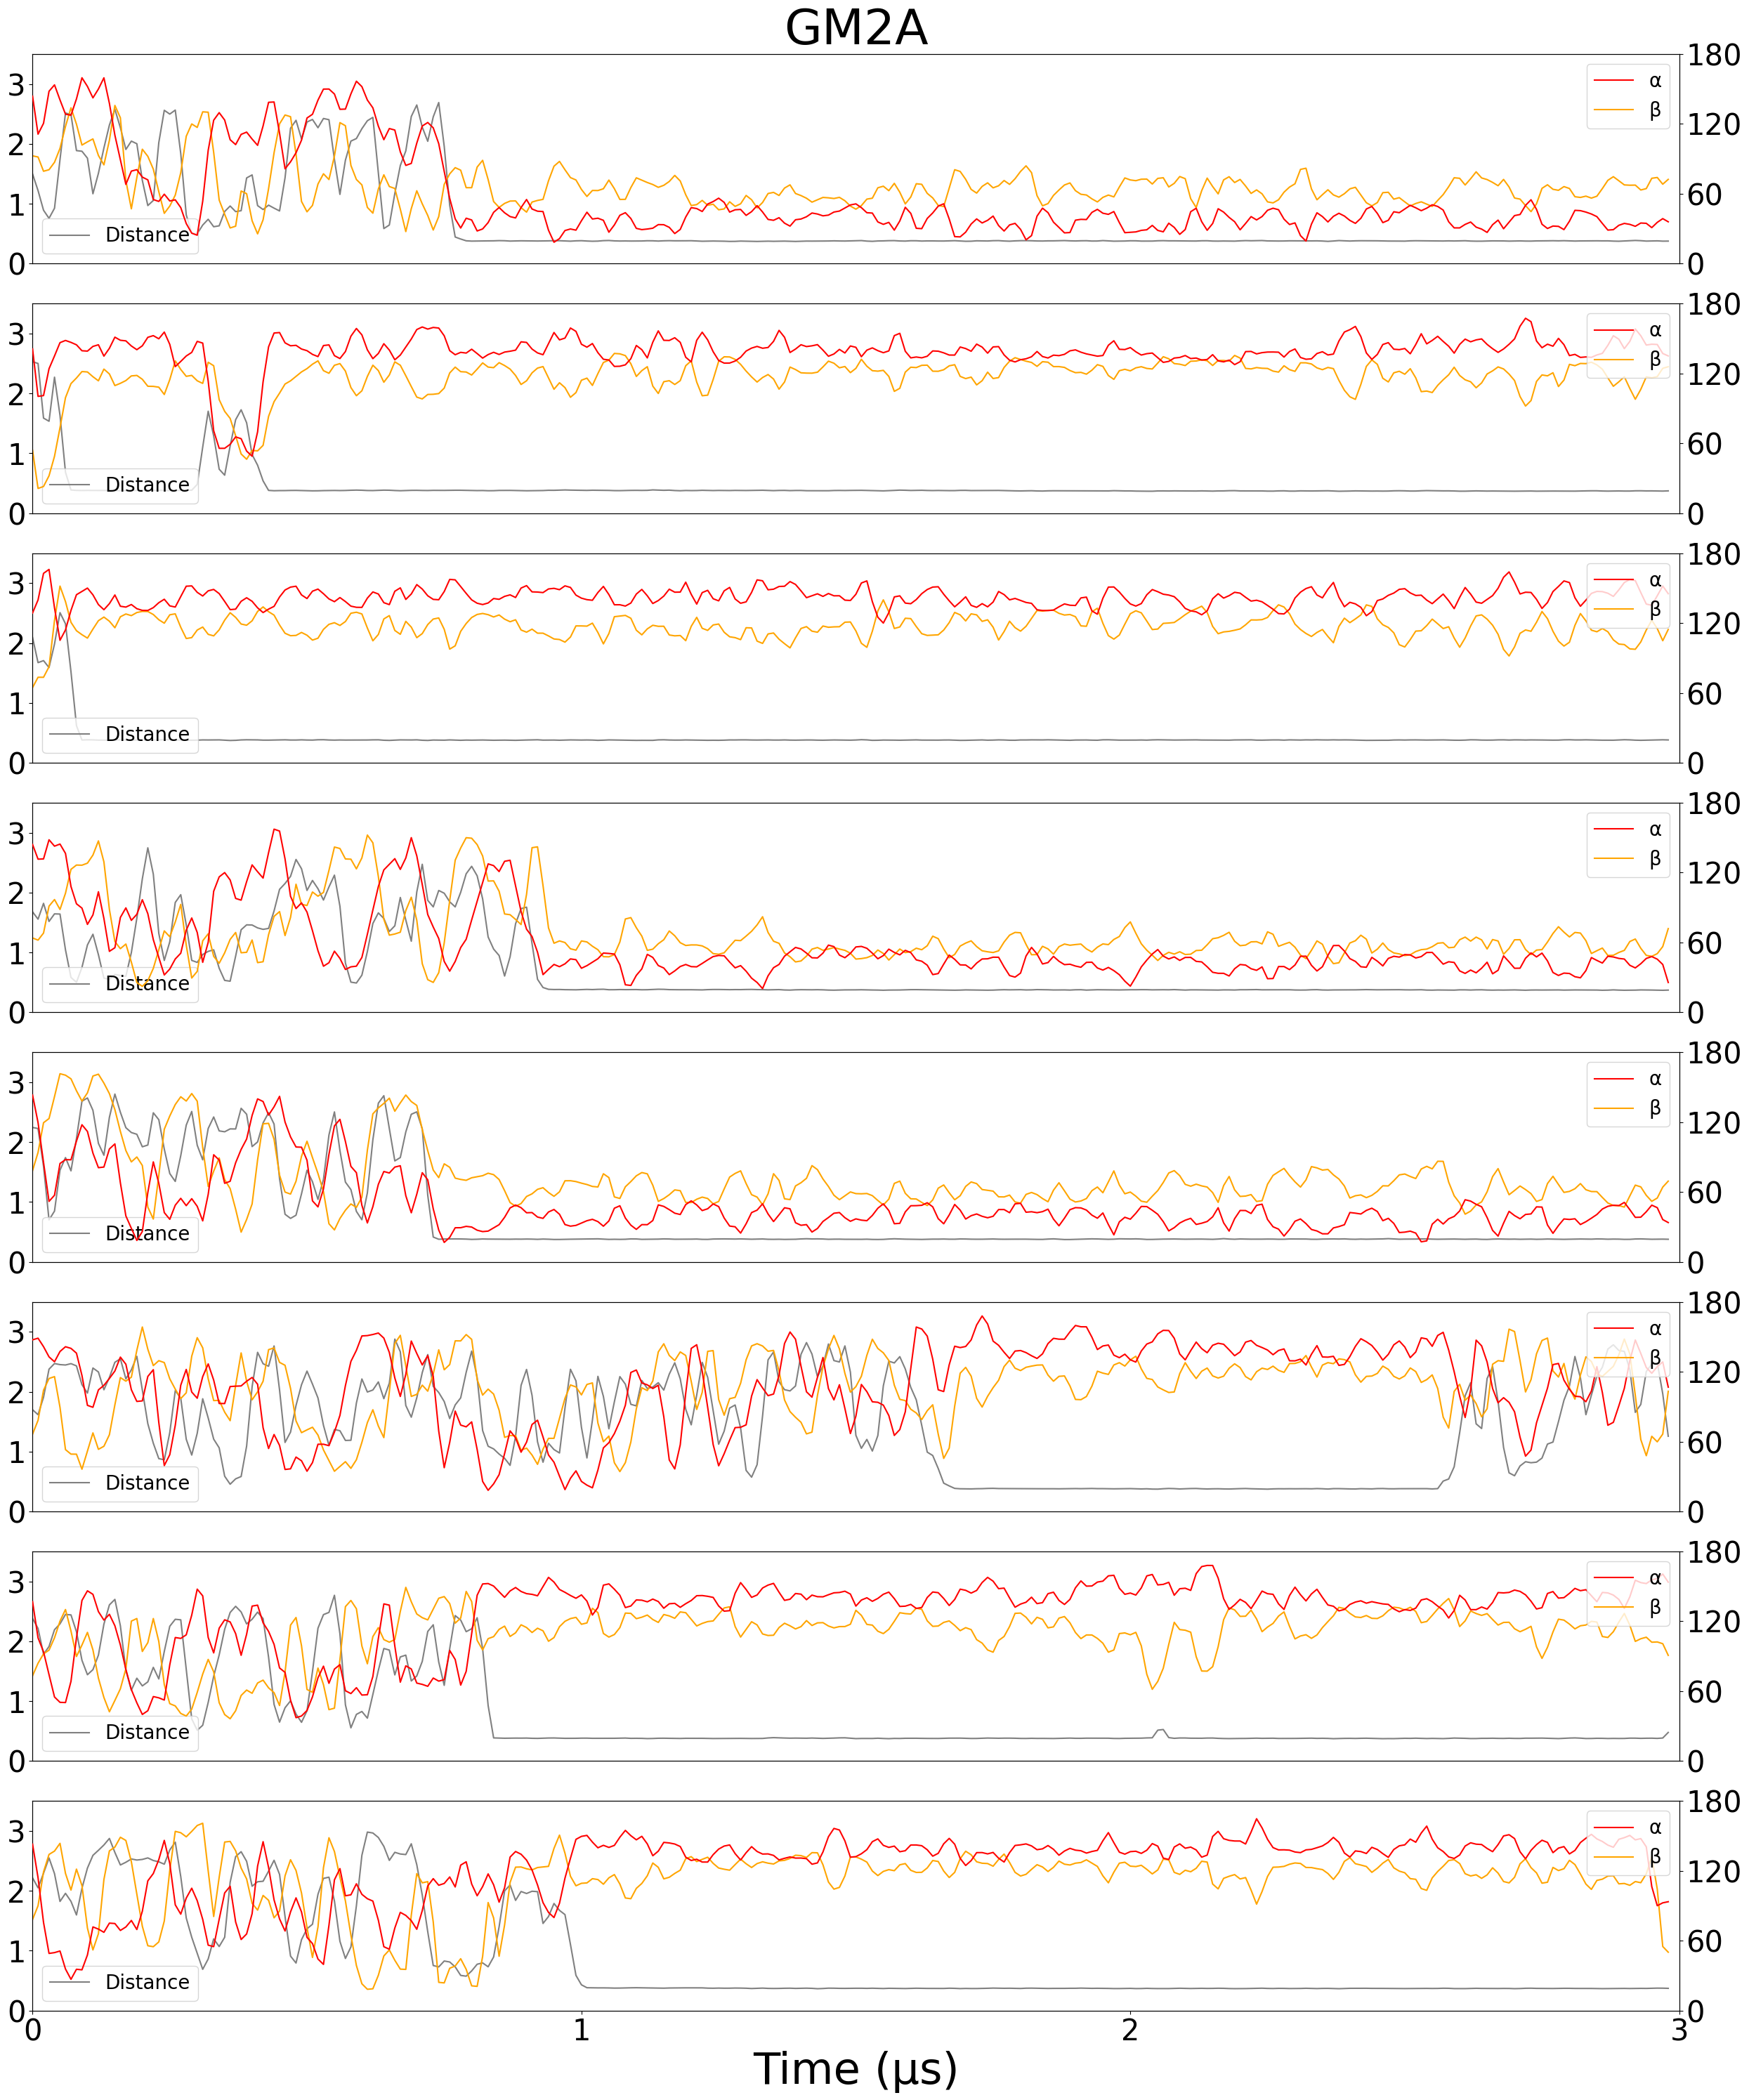

In [12]:
# Create a figure and subplots
fig, ax2 = plt.subplots(8, 1, figsize=(25, 30))
size_label = 30

for r in range(8):
# Plot the second data using ax2
    ax2[r].plot(new_time_dist[r], mean_dist[r], label='Distance', color="gray", zorder=1)
    #ax2[r].set_ylabel('Minimum distance (nm)')
    ax2[r].tick_params(axis='y', labelsize=size_label)
    ax2[r].tick_params(axis='x', labelsize=size_label)
    ax2[r].set_ylim([0,3.5])
    ax2[r].set_yticks([0,1,2,3])
    ax2[r].set_xticks([])
    ax2[r].legend(loc='lower left',fancybox=True,fontsize=20)
    if r==0:
        title = ax2[r].set_title("GM2A")
        title.set_size(50)
    if r==7:
        xlabel = ax2[r].set_xlabel("Time (\u03BCs)")
        xlabel.set_size(45)
        ax2[r].set_xticks([0,1,2,3])

for r in range(8):
# Create a second y-axis that shares the same x-axis
    axs = ax2[r].twinx()
# Plot on each subplot
    axs.plot(new_time[r],mean_147[r], label="\u03B1", color="red", zorder=3)
    axs.plot(new_time[r],mean_74[r], label="\u03B2", color="orange", zorder=2)
#    axs[r].set_title('Replica ' + str(r + 1))
    axs.set_xlim([0,3])
    axs.set_ylim([0,180])
    axs.tick_params(axis='y', labelsize=size_label)
    axs.set_yticks([0,60,120,180])
    #angle_label = axs.set_ylabel("Angle (Degrees)")
    axs.legend(loc='upper right',fancybox=True,fontsize=20)


    
# Add more plots for each subplot...
#plt.ylim([0,180])

# Adjust spacing between subplots
plt.tight_layout()
#plt.title("GM2A: Minimum distance to the membrane and angles with respect to z axis")

# Display the plot
plt.savefig("Mindist_Angles_GM2A_Large_2.png")